In [1]:
import torch
import numpy as np

## Tensor basics

In [2]:
x = torch.tensor([2.5, 0.1])
print(x)

tensor([2.5000, 0.1000])


In [3]:
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)

z = x + y
z = torch.add(x, y)
z = y
z.add_(x) # underscore _ means in place methods
print(y)

z = x - y
z = torch.sub(x, y)
print(z)

z = x * y
z = torch.mul(x, y)

z = x / y
z = torch.div(x, y)


tensor([[0.4095, 0.8918],
        [0.7204, 0.7243]])
tensor([[0.1285, 0.3802],
        [0.3443, 0.8099]])
tensor([[0.5380, 1.2720],
        [1.0647, 1.5342]])
tensor([[-0.1285, -0.3802],
        [-0.3443, -0.8099]])


In [4]:
x = torch.rand(5, 3)
print(x)
print(x[1, :])
print(x[:, 1])
print(x[1, 1], x[1, 1].item())

tensor([[0.5469, 0.4589, 0.8741],
        [0.5115, 0.5047, 0.6537],
        [0.0795, 0.4250, 0.7985],
        [0.2855, 0.2658, 0.5943],
        [0.8530, 0.6608, 0.7185]])
tensor([0.5115, 0.5047, 0.6537])
tensor([0.4589, 0.5047, 0.4250, 0.2658, 0.6608])
tensor(0.5047) 0.5047381520271301


In [5]:
x = torch.rand(4, 4)
print(x)
y = x.view(-1, 8)
print(y)
print(y.size())


tensor([[0.1233, 0.9917, 0.7396, 0.6496],
        [0.6185, 0.9230, 0.9837, 0.2819],
        [0.9908, 0.8570, 0.1864, 0.5092],
        [0.0396, 0.6310, 0.5968, 0.7504]])
tensor([[0.1233, 0.9917, 0.7396, 0.6496, 0.6185, 0.9230, 0.9837, 0.2819],
        [0.9908, 0.8570, 0.1864, 0.5092, 0.0396, 0.6310, 0.5968, 0.7504]])
torch.Size([2, 8])


In [6]:
a = torch.ones(5)
print(a)
b = a.numpy()
a.add_(1) # shared memory location
print(b)

c = np.zeros(5)
print(c)
d = torch.from_numpy(c)
c += 1 # also shared memory
print(d)

tensor([1., 1., 1., 1., 1.])
[2. 2. 2. 2. 2.]
[0. 0. 0. 0. 0.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [7]:
# Not shared memory, but have to cast to cpu
a = torch.ones(5, device="cuda").to('cuda') # both ways are valid
print("a:", a)
b = a.cpu().numpy() 
a.add_(1)
print("b:", b)

c = np.zeros(5)
print("c:", c)
d = torch.from_numpy(c).to('cuda') # prevents shared memory, only valid way to set device = cuda
c += 1
print("d:", d)

a: tensor([1., 1., 1., 1., 1.], device='cuda:0')
b: [1. 1. 1. 1. 1.]
c: [0. 0. 0. 0. 0.]
d: tensor([0., 0., 0., 0., 0.], device='cuda:0', dtype=torch.float64)


In [8]:
x = torch.ones(5, requires_grad=True) # default false, if you need gradients this needs to be set to true
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


## Autograd

In [9]:
import torch

In [10]:
x = torch.randn(3, requires_grad=True)
print(x)
y = x+2 
print(y)
z = y*y*2
print(z)
#z = z.mean()
#print(z)
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v) # dz/dx
print(x.grad)

tensor([-0.1076,  0.8526,  1.2850], requires_grad=True)
tensor([1.8924, 2.8526, 3.2850], grad_fn=<AddBackward0>)
tensor([ 7.1627, 16.2746, 21.5831], grad_fn=<MulBackward0>)
tensor([ 0.7570, 11.4104,  0.0131])


In [11]:
x = torch.randn(3, requires_grad=True)
print(x)

# options to remove requires_grad
# x.requires_grad_(False)
# x.detach()
# with toch.no_grad():

y = x.detach()
print(y)

with torch.no_grad():
    y = x + 2
    print(y-2)

x.requires_grad_(False)
print(x)

tensor([-1.1379,  0.4612, -0.4540], requires_grad=True)
tensor([-1.1379,  0.4612, -0.4540])
tensor([-1.1379,  0.4612, -0.4540])
tensor([-1.1379,  0.4612, -0.4540])


In [12]:
weights = torch.ones(4, requires_grad=True)
for epoch in range(3):
    model_output = (weights*3).sum()
    
    model_output.backward()
    print(weights.grad)

    weights.grad.zero_() # need to zero gradient every epoch
    


tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [13]:
# zero the optimizer gradient in every iteration as well:

# weights = torch.ones(4, requires_grad=True)
# optimizer = torch.optim.SGD(weights, lr=0.01)
# optimizer.step()
# optimizer.zero_grad() 

## Backpropagation

In [14]:
import torch

In [15]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute loss
y_hat = w * x
loss = (y_hat - y)**2

print(loss)

# backward pass
loss.backward()
print(w.grad)

# update weights
# next forward and backwards

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


## Autograd

In [16]:
import torch
import numpy as np

In [17]:
# f = w * x
# f = 2 * x

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([1, 2, 3, 4], dtype=np.float32)*2

w = 0.0

# model prediciton
def forward(x):
    return w * x

# loss
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)

def gradient(x,y,y_pred):
    return np.dot(2*x, y_pred-y).mean()


print(f'prediction before training: f(5) = {forward(5):.3f}')

#training 
lr = 0.01
n_iters = 20
for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradient
    dw = gradient(X, Y, y_pred)

    # update weights
    w -= lr * dw

    if(epoch % 2 == 0):
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'prediction after training: f(5) = {forward(5):.3f}')

prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
prediction after training: f(5) = 10.000


In [18]:
# f = w * x
# f = 2 * x

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([1, 2, 3, 4], dtype=torch.float32)*2

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediciton
def forward(x):
    return w * x

# loss
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()


print(f'prediction before training: f(5) = {forward(5):.3f}')

#training 
lr = 0.01
n_iters = 100
for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # gradient = backward pass
    l.backward() # dl/dw

    # update weights
    with torch.no_grad():
        w -= lr * w.grad

    # zero gradient
    w.grad.zero_()

    if(epoch % 10 == 0):
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'prediction after training: f(5) = {forward(5):.3f}')

prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
prediction after training: f(5) = 10.000


In [19]:
# 1) Design model (input size, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Traning loop
    # Forward pass: Compute prediction
    # backward pass: gradients
    # update weights
# 4) repeat 3 until satisfactory accuracy
import torch.nn as nn


# f(x) = 2 * x
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)*2

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

print(f'prediction before training: f(5) = {model(X_test).item():.3f}')

#training 
lr = 0.01
n_iters = 1000

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)

    # loss
    l = loss(Y, y_pred)

    # gradient = backward pass
    l.backward() # dl/dw

    # update weights
    optimizer.step()

    # zero gradient
    optimizer.zero_grad()

    if(epoch % 100 == 0):
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'prediction after training: f(5) = {model(X_test).item():.3f}')

4 1
prediction before training: f(5) = 3.069
epoch 1: w = 0.833, loss = 14.55656528
epoch 101: w = 1.906, loss = 0.01272757
epoch 201: w = 1.931, loss = 0.00698728
epoch 301: w = 1.949, loss = 0.00383594
epoch 401: w = 1.962, loss = 0.00210589
epoch 501: w = 1.972, loss = 0.00115611
epoch 601: w = 1.979, loss = 0.00063469
epoch 701: w = 1.985, loss = 0.00034843
epoch 801: w = 1.989, loss = 0.00019129
epoch 901: w = 1.991, loss = 0.00010501
prediction after training: f(5) = 9.987


In [20]:
import torch.nn as nn


# f(x) = 2 * x
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)*2

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()

        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f'prediction before training: f(5) = {model(X_test).item():.3f}')

#training 
lr = 0.01
n_iters = 1000

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)

    # loss
    l = loss(Y, y_pred)

    # gradient = backward pass
    l.backward() # dl/dw

    # update weights
    optimizer.step()

    # zero gradient
    optimizer.zero_grad()

    if(epoch % 100 == 0):
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'prediction after training: f(5) = {model(X_test).item():.3f}')

4 1
prediction before training: f(5) = -1.100
epoch 1: w = 0.252, loss = 39.89111328
epoch 101: w = 1.982, loss = 0.00046402
epoch 201: w = 1.987, loss = 0.00025474
epoch 301: w = 1.990, loss = 0.00013985
epoch 401: w = 1.993, loss = 0.00007678
epoch 501: w = 1.995, loss = 0.00004215
epoch 601: w = 1.996, loss = 0.00002314
epoch 701: w = 1.997, loss = 0.00001270
epoch 801: w = 1.998, loss = 0.00000697
epoch 901: w = 1.998, loss = 0.00000383
prediction after training: f(5) = 9.998


## full example linear regression

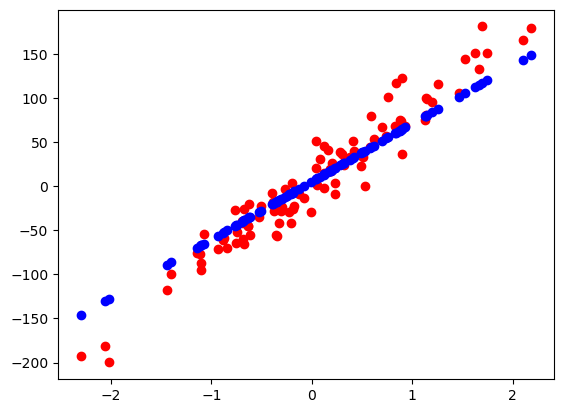

In [21]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape


# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
lr = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # backward pass
    loss.backward()

    # update
    optimizer.step()

    # empty gradient
    optimizer.zero_grad()

    if(epoch+1 % 10 == 0):
        print(f'epoch:{epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "bo")
plt.show()

## Logistic regression

In [22]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# 0) prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1) model
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        x = self.linear(x)
        return torch.sigmoid(x)
    
model = LogisticRegression(n_features)

# 2) loss and optimizer
lr = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # backward pass
    loss.backward()

    # update
    optimizer.step()

    # empty gradient
    optimizer.zero_grad()

    if((epoch+1) % 10 == 0):
        print(f'epoch:{epoch+1}, loss = {loss.item():.4f}')

# evaluate
with torch.no_grad(): # prevent computation graph buildup
    test_pred = model(X_test)
    test_pred_cls = test_pred.round()
    acc = test_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(acc.item())

epoch:10, loss = 0.5679
epoch:20, loss = 0.4819
epoch:30, loss = 0.4240
epoch:40, loss = 0.3821
epoch:50, loss = 0.3500
epoch:60, loss = 0.3245
epoch:70, loss = 0.3036
epoch:80, loss = 0.2861
epoch:90, loss = 0.2712
epoch:100, loss = 0.2583
0.8771929740905762


## Data Loaders


In [23]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self):
        # data loading
        xy = np.loadtxt('./data/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # adding zero in a list makes it easier later
        self.n_samples = xy.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples
    
dataset = WineDataset()
batch_size = 4
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# training loop
num_epochs = 2
total_samples = len(dataset)
n_iter = math.ceil(total_samples / batch_size)
print(total_samples, n_iter)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        if((i+1) % 5 == 0):
            print(f'epoch: {epoch+1}/{num_epochs}, step{i+1}/{n_iter}, inputs: {inputs.shape}')

#dataiter = iter(dataloader)
#data = next(dataiter) # not dataiter.next()
#features, labels = data
#print(features, labels)

178 45
epoch: 1/2, step5/45, inputs: torch.Size([4, 13])
epoch: 1/2, step10/45, inputs: torch.Size([4, 13])
epoch: 1/2, step15/45, inputs: torch.Size([4, 13])
epoch: 1/2, step20/45, inputs: torch.Size([4, 13])
epoch: 1/2, step25/45, inputs: torch.Size([4, 13])
epoch: 1/2, step30/45, inputs: torch.Size([4, 13])
epoch: 1/2, step35/45, inputs: torch.Size([4, 13])
epoch: 1/2, step40/45, inputs: torch.Size([4, 13])
epoch: 1/2, step45/45, inputs: torch.Size([2, 13])
epoch: 2/2, step5/45, inputs: torch.Size([4, 13])
epoch: 2/2, step10/45, inputs: torch.Size([4, 13])
epoch: 2/2, step15/45, inputs: torch.Size([4, 13])
epoch: 2/2, step20/45, inputs: torch.Size([4, 13])
epoch: 2/2, step25/45, inputs: torch.Size([4, 13])
epoch: 2/2, step30/45, inputs: torch.Size([4, 13])
epoch: 2/2, step35/45, inputs: torch.Size([4, 13])
epoch: 2/2, step40/45, inputs: torch.Size([4, 13])
epoch: 2/2, step45/45, inputs: torch.Size([2, 13])


## dataset transforms
https://pytorch.org/vision/0.11/transforms.html

In [24]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self, transform=None):
        # data loading
        xy = np.loadtxt('./data/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = xy[:, 1:]
        self.y = xy[:, [0]]
        self.n_samples = xy.shape[0]

        self.transform=transform

    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if (self.transform):
            sample = self.transform(sample)
        
        return sample
    
    def __len__(self):
        return self.n_samples

class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    def __init__(self, factor):
        self.factor = factor
    
    def __call__(self, sample):
        inputs, targets = sample
        return inputs*self.factor, targets

dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(features, type(labels))

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])

dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features, type(labels))

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03]) <class 'torch.Tensor'>


## Softmax and Cross-Entropy

In [25]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=0)

x = np.array([2, 1, 0.1])
outputs = softmax(x)
print(outputs)

x = torch.tensor([2, 1, 0.1])
outputs = torch.softmax(x, dim=0)
print(outputs)



[0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])


In [26]:
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss

Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])

l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)

print(l1, l2)


loss = nn.CrossEntropyLoss()

Y = torch.tensor([0]) 
# nsamples x nclasses = 1x3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(l1.item(), l2.item())

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(predictions1.item(), predictions2.item())

loss = nn.CrossEntropyLoss()

Y = torch.tensor([2, 0, 1]) 
# nsamples x nclasses = 3x3
Y_pred_good = torch.tensor([[.01, 1.0, 2.1],[2.0, 1.0, 0.1],[0.1, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1],[0.1, 1.0, 2.1],[0.1, 3.0, 0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(l1.item(), l2.item())

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(predictions1, predictions2)

0.35667494393873245 2.3025850929940455
0.4170299470424652 1.840616226196289
0 1
0.2991693317890167 1.6241613626480103
tensor([2, 0, 1]) tensor([0, 2, 1])


In [27]:
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = torch.sigmoid(out) # need to do sigmoid for binary classification
        return out

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() # applies Softmax for us.

## Activation Functions

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F # some activation functions are only available as functions here, and not in torch.<function>

# option 1: define activation function "layers"
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

# option 2: perform activation function on the layers in the forward function call
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

## Feedforward NN example

In [29]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# MNIST

# hyper params
input_size = 28*28
hidden_size = 100
num_classes = 10
num_epochs = 30
batch_size = 128
learning_rate = 0.003

# DataLoader, Transformation
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

#examples = iter(train_loader)
#samples, labels = next(examples)

#print(samples.shape, labels.shape)

#for i in range(6):
#    plt.subplot(2, 3, i+1)
#    plt.imshow(samples[i][0], cmap="gray")
#    plt.title(labels[i].item())



# Multilayer Neural Net, activation Function
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.linear3(out)
        
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Traning Loop
steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 128, 1, 28, 28 image shape
        # want 128, 28*28
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if((i+1) % 400 == 0):
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{steps}, loss = {loss.item():.4f}')


# Model evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i, (images, labels) in enumerate(test_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index returned by torch.max()
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100*n_correct/n_samples
    print(f'accuracy = {acc:.1f}%')


epoch 1/30, step 400/469, loss = 0.1184
epoch 2/30, step 400/469, loss = 0.1657
epoch 3/30, step 400/469, loss = 0.0456
epoch 4/30, step 400/469, loss = 0.0832
epoch 5/30, step 400/469, loss = 0.0680
epoch 6/30, step 400/469, loss = 0.0701
epoch 7/30, step 400/469, loss = 0.0182
epoch 8/30, step 400/469, loss = 0.0289
epoch 9/30, step 400/469, loss = 0.0166
epoch 10/30, step 400/469, loss = 0.0203
epoch 11/30, step 400/469, loss = 0.0081
epoch 12/30, step 400/469, loss = 0.0048
epoch 13/30, step 400/469, loss = 0.0118
epoch 14/30, step 400/469, loss = 0.0065
epoch 15/30, step 400/469, loss = 0.0115
epoch 16/30, step 400/469, loss = 0.0005
epoch 17/30, step 400/469, loss = 0.0045
epoch 18/30, step 400/469, loss = 0.0019
epoch 19/30, step 400/469, loss = 0.0286
epoch 20/30, step 400/469, loss = 0.0425
epoch 21/30, step 400/469, loss = 0.0007
epoch 22/30, step 400/469, loss = 0.0056
epoch 23/30, step 400/469, loss = 0.0057
epoch 24/30, step 400/469, loss = 0.1383
epoch 25/30, step 400/469

## Convolutional Neural Networks

In [30]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper params
num_epochs = 15
batch_size = 64
learning_rate = 0.0005

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (.5, .5, .5))
])

train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False, download=False, transform=transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset, 
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=True
)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.pool = nn.MaxPool2d(2, 2) # 14 x 14 x 6
        self.conv2 = nn.Conv2d(6, 16, 5) # 10 x 10 x 16
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        out = self.conv1(x)     # 6 x 28 x 28
        out = self.relu(out)
        out = self.pool(out)    # 6 x 14 x 14
        out = self.conv2(out)   # 16 x 10 x 10
        out = self.relu(out)
        out = self.pool(out)    # 16 x 5 x 5
        # flatten
        out = out.view(-1, 16*5*5)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Traning Loop
steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if((i+1) % 400 == 0):
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{steps}, loss = {loss.item():.4f}')


# Model evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for i, (images, labels) in enumerate(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index returned by torch.max()
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

        for i in range(labels.shape[0]):
            label = labels[i]
            pred = predictions[i]
            if(label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    
    acc = 100*n_correct/n_samples
    print(f'accuracy = {acc:.1f}%')
    
    for i in range(10):
        acc = 100 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc}%')

Files already downloaded and verified
epoch 1/15, step 400/782, loss = 1.6820
epoch 2/15, step 400/782, loss = 1.5568
epoch 3/15, step 400/782, loss = 1.3298
epoch 4/15, step 400/782, loss = 1.2473
epoch 5/15, step 400/782, loss = 1.3476
epoch 6/15, step 400/782, loss = 1.3405
epoch 7/15, step 400/782, loss = 0.9662
epoch 8/15, step 400/782, loss = 1.2362
epoch 9/15, step 400/782, loss = 0.8890
epoch 10/15, step 400/782, loss = 1.0193
epoch 11/15, step 400/782, loss = 0.9999
epoch 12/15, step 400/782, loss = 1.0572
epoch 13/15, step 400/782, loss = 0.7738
epoch 14/15, step 400/782, loss = 1.0322
epoch 15/15, step 400/782, loss = 0.6610
accuracy = 62.6%
Accuracy of plane: 65.4%
Accuracy of car: 70.3%
Accuracy of bird: 53.5%
Accuracy of cat: 45.8%
Accuracy of deer: 53.3%
Accuracy of dog: 42.7%
Accuracy of frog: 78.2%
Accuracy of horse: 71.3%
Accuracy of ship: 84.1%
Accuracy of truck: 61.0%


# Transfer Learning

['ants', 'bees']


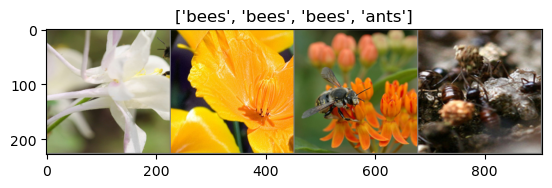

/home/user-1/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/user-1/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/24
----------
train Loss: 0.5234 Acc: 0.7172
val Loss: 0.3641 Acc: 0.8301

Epoch 1/24
----------
train Loss: 0.5366 Acc: 0.7500
val Loss: 0.3144 Acc: 0.8562

Epoch 2/24
----------
train Loss: 0.5930 Acc: 0.7705
val Loss: 0.2868 Acc: 0.8889

Epoch 3/24
----------
train Loss: 0.3839 Acc: 0.8238
val Loss: 0.1790 Acc: 0.9477

Epoch 4/24
----------
train Loss: 0.4603 Acc: 0.7951
val Loss: 0.1721 Acc: 0.9477

Epoch 5/24
----------
train Loss: 0.6106 Acc: 0.7787
val Loss: 0.1706 Acc: 0.9608

Epoch 6/24
----------
train Loss: 0.5040 Acc: 0.7910
val Loss: 0.1805 Acc: 0.9477

Epoch 7/24
----------
train Loss: 0.2708 Acc: 0.8770
val Loss: 0.1689 Acc: 0.9608

Epoch 8/24
----------
train Loss: 0.3820 Acc: 0.8279
val Loss: 0.1488 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.3195 Acc: 0.8484
val Loss: 0.1615 Acc: 0.9608

Epoch 10/24
----------
train Loss: 0.3692 Acc: 0.8156
val Loss: 0.1739 Acc: 0.9477

Epoch 11/24
----------
train Loss: 0.3585 Acc: 0.8402
val Loss: 0.1903 Acc: 0.9412

Ep

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names)


def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

#### Finetuning the convnet ####
# Load a pretrained model and reset final fully connected layer.

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.Adam(model.parameters(), lr=0.001)

# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step()

step_lr_scheduler = lr_scheduler.StepLR(
    optimizer, 
    step_size=7, # every 7 epochs 
    gamma=0.1) # our learning rate gets multiplied by 0.1

#model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)


#### ConvNet as fixed feature extractor ####
# Here, we need to freeze all the network except the final layer.
# We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)